In [105]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
import os

## Grundperiode, Grundfrequenz, Signaldauer, Abtastfrequenz, Signallänge, Abtastintervall
## Signal graphisch dargestellt

Grundperiode: 1.8ms
Grundfrequenz: 555.5555555555555hz
Signaldauer: 0.05001499873s
Singallänge: 10004
Abtastfrequenz: 200020.0Hz
Abtastintervall: 4.999999873038088e-06s


(-0.00999968, 4.99000019)

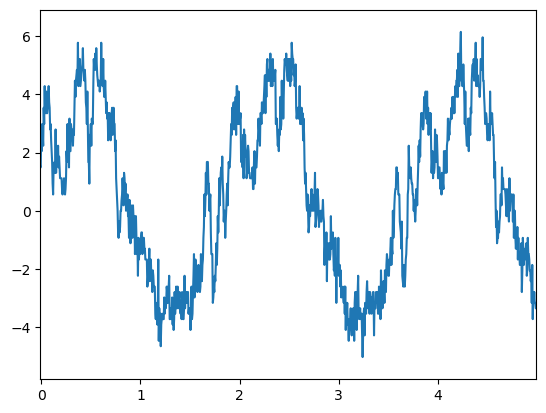

In [106]:
abtast, messdaten = np.genfromtxt(os.getcwd() + "/Messdaten/mundharmonika.csv", delimiter=";", skip_header=3, usecols=(0,1)).T

signaldauer = (np.abs(abtast[0]) + np.abs(abtast[-1])) / 1000
signalLen = len(abtast)
abtastFreq = signalLen * (1 / signaldauer)
abtastIntervall_list = []
for i in range(signalLen-1):
    abtastIntervall_list.append((abtast[i+1] - abtast[i]) / 1000)
abtastIntervall = np.mean(abtastIntervall_list)
grundperiode = 1.8 # Abgelesen?
grundFreq = 1/(grundperiode/1000)
print(f"Grundperiode: {grundperiode}ms")
print(f"Grundfrequenz: {grundFreq}hz")
print(f"Signaldauer: {signaldauer}s")
print(f"Singallänge: {signalLen}")
print(f"Abtastfrequenz: {np.round(abtastFreq)}Hz")
print(f"Abtastintervall: {abtastIntervall}s")

plt.plot(abtast, messdaten)
plt.xlim(abtast[5000], abtast[6000])

# Fouriertransformierte des Signals
## max Amplitude, Grundfrequenz

Amplitude: 16993.796184299783
Grundfrequenz: 199480.21298211112hz


Text(0.5, 1.0, 'Amplitude Spectrum')

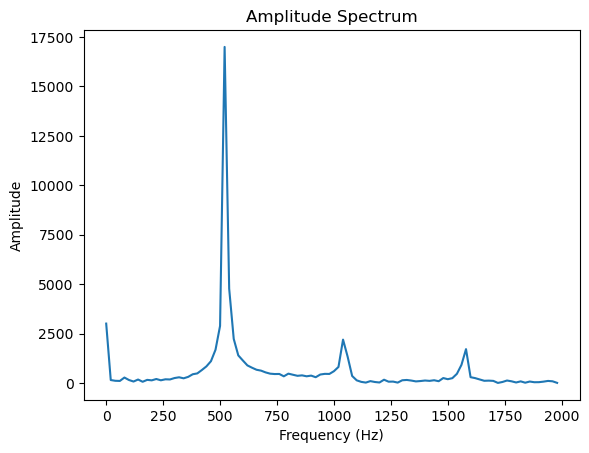

In [107]:
fourier_transform = np.fft.fft(messdaten)
amplituden = np.abs(fourier_transform)
frequenzen = [i / (signalLen * abtastIntervall) for i in range(signalLen)]
grundFreq = frequenzen[np.argmax(amplituden)]
print(f"Amplitude: {np.max(amplituden)}")
print(f"Grundfrequenz: {grundFreq}hz")
plt.plot(frequenzen[:100], amplituden[:100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
# plt.axvline(grundFreq, color='r', linestyle=':', label='Fundamental Frequency')


# Amplituden und Phasengang

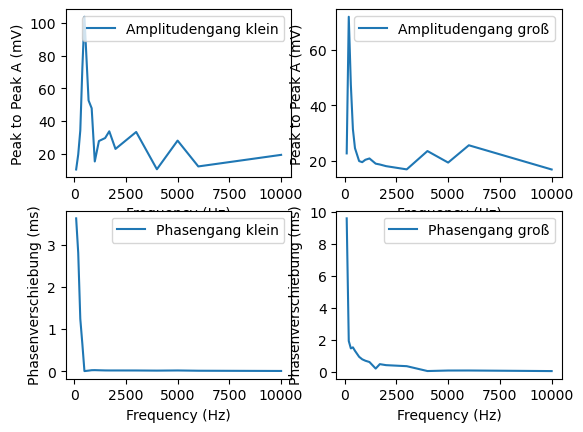

In [108]:
k_freq, _, k_mic, k_phase = np.genfromtxt(os.getcwd() + "/Messdaten/lautsprecher_klein.csv", delimiter=",", skip_header=1).T
g_freq, _, g_mic, g_phase = np.genfromtxt(os.getcwd() + "/Messdaten/lautsprecher_groß.csv", delimiter=",", skip_header=1).T

plt.subplot(2,2,1)
plt.plot(k_freq, k_mic, label="Amplitudengang klein")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Peak to Peak A (mV)')
plt.legend()
plt.subplot(2,2,3)
plt.plot(k_freq, k_phase, label="Phasengang klein")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phasenverschiebung (ms)')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.subplot(2,2,2)
plt.plot(g_freq, g_mic, label="Amplitudengang groß")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Peak to Peak A (mV)')
plt.legend()
plt.subplot(2,2,4)
plt.plot(g_freq, g_phase, label="Phasengang groß")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phasenverschiebung (ms)')
plt.legend()

# Bode-Diagramm

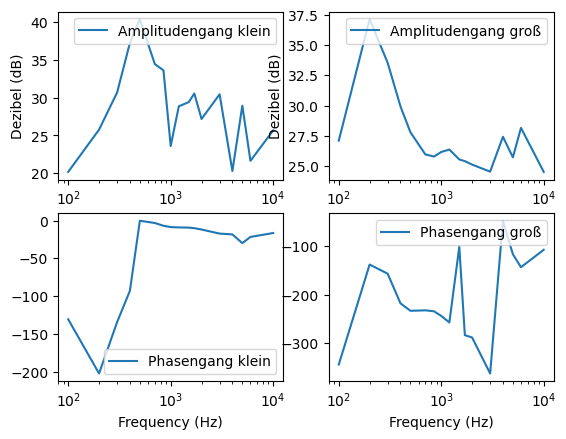

In [109]:
k_dezibel = [20 * np.log10(x) for x in k_mic]
k_phasenwinkel = [-k_phase[i]/1000 * f * 360 for i,f in enumerate(k_freq)]
g_dezibel = [20 * np.log10(x) for x in g_mic]
g_phasenwinkel = [-g_phase[i]/1000 * f * 360 for i,f in enumerate(g_freq)]

plt.subplot(2,2,1)
plt.semilogx(k_freq, k_dezibel, label="Amplitudengang klein")
plt.ylabel('Dezibel (dB)')
plt.legend()
plt.subplot(2,2,3)
plt.semilogx(k_freq, k_phasenwinkel, label="Phasengang klein")
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.subplot(2,2,2)
plt.semilogx(g_freq, g_dezibel, label="Amplitudengang groß")
plt.ylabel('Dezibel (dB)')
plt.legend()
plt.subplot(2,2,4)
plt.semilogx(g_freq, g_phasenwinkel, label="Phasengang groß")
plt.xlabel('Frequency (Hz)')
plt.legend()